# Prerequisites: Hessian Matrix, Definiteness, and Curvature

This notebook covers essential background knowledge needed before studying Chapter 7.1 of Deep Learning.

**Topics covered:**
1. Hessian Matrix - Definition and Properties
2. Matrix Definiteness - Classification and Testing
3. Curvature Interpretation - Geometric Understanding

---

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


### **Why Second Derivatives Matter in Optimization**

When minimizing a function $f(x)$:

1. **First derivative $f'(x) = 0$** → Find critical points (potential minimum/maximum)
2. **Second derivative $f''(x)$** → Determine the **type** of critical point:
   - $f''(x) > 0$ → **Local minimum** ✅
   - $f''(x) < 0$ → **Local maximum** ❌
   - $f''(x) = 0$ → **Inconclusive** (need further testing)

**In multiple dimensions:**
- The **Hessian matrix** generalizes the second derivative to functions of many variables
- It's an $n \times n$ matrix of all second-order partial derivatives
- We use **eigenvalues** of the Hessian (instead of sign of $f''$) to classify critical points

---

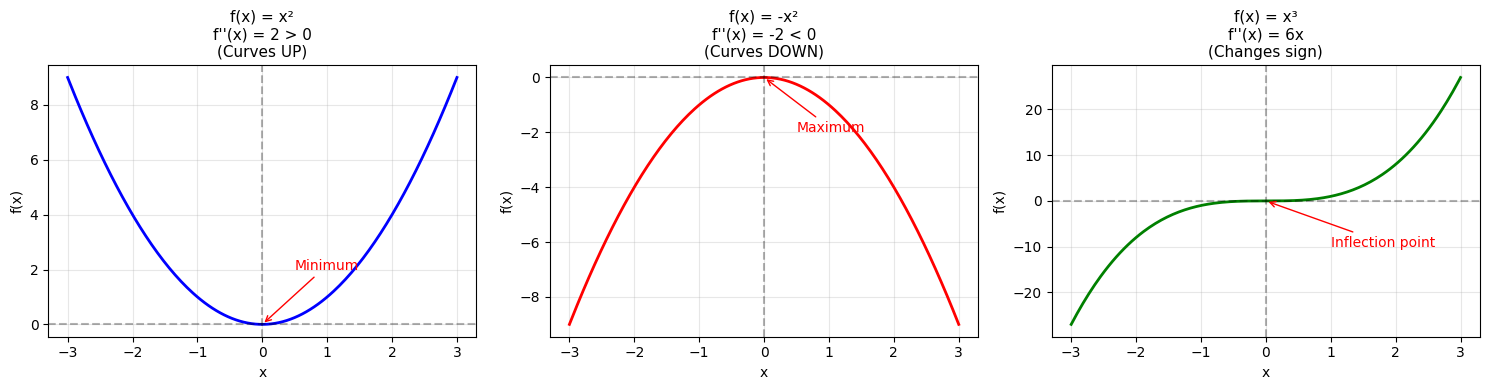

Key observations:
1. f''(x) > 0 → Curves upward (bowl shape) → potential minimum
2. f''(x) < 0 → Curves downward (dome shape) → potential maximum
3. f''(x) = 0 → Could be inflection point (curvature changes)


In [53]:
x = np.linspace(-3, 3, 200)

# Three functions with different second derivatives
f1 = x**2           # f''(x) = 2 (positive, curves up)
f2 = -x**2          # f''(x) = -2 (negative, curves down)
f3 = x**3           # f''(x) = 6x (changes sign at x=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Function 1: f(x) = x²
axes[0].plot(x, f1, 'b-', linewidth=2)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0].set_title("f(x) = x²\nf''(x) = 2 > 0\n(Curves UP)", fontsize=11)
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].grid(True, alpha=0.3)
axes[0].annotate('Minimum', xy=(0, 0), xytext=(0.5, 2),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=10, color='red')

# Function 2: f(x) = -x²
axes[1].plot(x, f2, 'r-', linewidth=2)
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1].set_title("f(x) = -x²\nf''(x) = -2 < 0\n(Curves DOWN)", fontsize=11)
axes[1].set_xlabel('x')
axes[1].set_ylabel('f(x)')
axes[1].grid(True, alpha=0.3)
axes[1].annotate('Maximum', xy=(0, 0), xytext=(0.5, -2),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=10, color='red')

# Function 3: f(x) = x³
axes[2].plot(x, f3, 'g-', linewidth=2)
axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[2].set_title("f(x) = x³\nf''(x) = 6x\n(Changes sign)", fontsize=11)
axes[2].set_xlabel('x')
axes[2].set_ylabel('f(x)')
axes[2].grid(True, alpha=0.3)
axes[2].annotate('Inflection point', xy=(0, 0), xytext=(1, -10),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=10, color='red')

plt.tight_layout()
plt.show()

print("Key observations:")
print("1. f''(x) > 0 → Curves upward (bowl shape) → potential minimum")
print("2. f''(x) < 0 → Curves downward (dome shape) → potential maximum")
print("3. f''(x) = 0 → Could be inflection point (curvature changes)")

### **Example: Visualizing Second Derivatives**

Let's examine three functions with different curvatures:

## 0️⃣ Quick Review: Second Derivatives

### **What is a Second Derivative?**

The **second derivative** is the derivative of the derivative:

$$
f'(x) = \frac{df}{dx} \quad \text{(first derivative)}
$$

$$
f''(x) = \frac{d^2f}{dx^2} = \frac{d}{dx}\left(\frac{df}{dx}\right) \quad \text{(second derivative)}
$$

### **What Does It Tell Us?**

| Derivative | Measures | Interpretation |
|------------|----------|----------------|
| **First** $f'(x)$ | Rate of change | How fast $f$ is increasing/decreasing |
| **Second** $f''(x)$ | Rate of change of the rate of change | **Curvature** (how the slope is changing) |

### **Geometric Meaning**

- $f''(x) > 0$ → Function is **curving upward** (convex, like a bowl ∪)
- $f''(x) < 0$ → Function is **curving downward** (concave, like a dome ∩)
- $f''(x) = 0$ → **Inflection point** (curvature changes direction)

## 1️⃣ Hessian Matrix

### **Definition**
For a scalar-valued function  
$$
f(\mathbf{x}) = f(x_1, x_2, \dots, x_n)
$$  
the **Hessian matrix** is the square matrix of all second-order partial derivatives:

$$
H(f) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

### **Key Properties**
- If mixed partial derivatives are continuous,  
  $$
  \frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{\partial^2 f}{\partial x_j \partial x_i}
  $$
  → the Hessian is **symmetric**: $H = H^\top$.
- Shape: $n \times n$ (determined by number of variables, not number of terms)
- Describes **curvature** (how the function bends) in all directions.

### **Simple Example**
$$
f(x, y) = x^2 + 3y^2
$$

$$
H =
\begin{bmatrix}
2 & 0 \\
0 & 6
\end{bmatrix}
$$
- Along x-axis: curvature = 2  
- Along y-axis: curvature = 6  
- No cross-dependency (off-diagonal = 0)

### **Usage**
- **Optimization:** Identify minima, maxima, or saddle points  
- **Second-order methods:** Newton's method  
- **Geometry:** Describes the "shape" of the loss surface  
- **Machine learning:** Analyze curvature of loss for stability and convergence

In [54]:
# Hessian for f(x,y) = x² + xy + y²
H_example = np.array([[2, 1],
                      [1, 2]])

print("Original Hessian:")
print(H_example)
print("\n" + "="*60)

# Step 1: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(H_example)

print("\nStep 1: Compute eigenvalues and eigenvectors")
print("-"*60)
print(f"Eigenvalues (λ): {eigenvalues}")
print(f"\nEigenvectors (columns of Q):")
print(eigenvectors)
print(f"\nInterpretation:")
print(f"  - λ₁ = {eigenvalues[0]:.1f}: curvature along direction [{eigenvectors[0,0]:.3f}, {eigenvectors[1,0]:.3f}]")
print(f"  - λ₂ = {eigenvalues[1]:.1f}: curvature along direction [{eigenvectors[0,1]:.3f}, {eigenvectors[1,1]:.3f}]")

# Step 2: Build Q and Λ matrices
Q = eigenvectors
Lambda = np.diag(eigenvalues)

print("\n" + "="*60)
print("\nStep 2: Build Q (eigenvector matrix) and Λ (diagonal eigenvalue matrix)")
print("-"*60)
print("Q (eigenvectors as columns):")
print(Q)
print("\nΛ (eigenvalues on diagonal):")
print(Lambda)

# Step 3: Verify Q is orthogonal (Q^T Q = I)
print("\n" + "="*60)
print("\nStep 3: Verify Q is orthogonal")
print("-"*60)
Q_T_Q = Q.T @ Q
print("Q^T Q =")
print(Q_T_Q)
print(f"Is Q^T Q ≈ I? {np.allclose(Q_T_Q, np.eye(2))}")

# Step 4: Reconstruct H from Q Λ Q^T
print("\n" + "="*60)
print("\nStep 4: Reconstruct H = Q Λ Q^T")
print("-"*60)
H_reconstructed = Q @ Lambda @ Q.T
print("Q Λ Q^T =")
print(H_reconstructed)
print(f"\nDoes H = Q Λ Q^T? {np.allclose(H_example, H_reconstructed)}")

print("\n" + "="*60)
print("\n🎯 Key Insight:")
print("The eigenvalue decomposition transforms H into a diagonal form Λ")
print("where curvatures along different principal directions are decoupled!")
print(f"  - Direction 1: curvature = {eigenvalues[0]:.1f}")
print(f"  - Direction 2: curvature = {eigenvalues[1]:.1f}")

Original Hessian:
[[2 1]
 [1 2]]


Step 1: Compute eigenvalues and eigenvectors
------------------------------------------------------------
Eigenvalues (λ): [3. 1.]

Eigenvectors (columns of Q):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Interpretation:
  - λ₁ = 3.0: curvature along direction [0.707, 0.707]
  - λ₂ = 1.0: curvature along direction [-0.707, 0.707]


Step 2: Build Q (eigenvector matrix) and Λ (diagonal eigenvalue matrix)
------------------------------------------------------------
Q (eigenvectors as columns):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Λ (eigenvalues on diagonal):
[[3. 0.]
 [0. 1.]]


Step 3: Verify Q is orthogonal
------------------------------------------------------------
Q^T Q =
[[1.00000000e+00 2.23711432e-17]
 [2.23711432e-17 1.00000000e+00]]
Is Q^T Q ≈ I? True


Step 4: Reconstruct H = Q Λ Q^T
------------------------------------------------------------
Q Λ Q^T =
[[2. 1.]
 [1. 2.]]

Does H = Q Λ Q^T? True


🎯 Key Insight:


#### Step-by-Step Example: Eigenvalue Decomposition

Let's compute $H = Q\Lambda Q^T$ for $f(x,y) = x^2 + xy + y^2$ with Hessian $H = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$

### **Eigenvalue Decomposition of Symmetric Hessian**

Since the Hessian is **symmetric** (under smooth conditions), it has a special decomposition:

$$
H = Q \Lambda Q^T
$$

where:
- $Q$: orthogonal matrix of **eigenvectors** (principal directions)
- $\Lambda = \text{diag}(\lambda_1, \lambda_2, \ldots, \lambda_n)$: diagonal matrix of **eigenvalues** (curvatures along principal directions)
- $Q^T Q = I$ (orthonormal eigenvectors)

**Geometric interpretation:**
- Eigenvectors point along the **principal axes** of curvature
- Eigenvalues give the **amount of curvature** in each principal direction
- This decomposition "diagonalizes" the Hessian, revealing independent directions

**Why this matters:**
- Optimization converges fastest when all eigenvalues are similar (well-conditioned)
- Large spread in eigenvalues → slow convergence (ill-conditioned)
- Zero eigenvalues → flat directions (semi-definite)

### Example 1: Computing a Hessian Matrix

Let's compute the Hessian for $f(x, y) = x^2 + 3y^2$

In [55]:
def f1(x, y):
    """Function: f(x,y) = x^2 + 3y^2"""
    return x**2 + 3*y**2

def hessian_f1():
    """
    Compute Hessian of f(x,y) = x^2 + 3y^2
    
    First derivatives:
    ∂f/∂x = 2x
    ∂f/∂y = 6y
    
    Second derivatives:
    ∂²f/∂x² = 2
    ∂²f/∂y² = 6
    ∂²f/∂x∂y = 0
    ∂²f/∂y∂x = 0
    """
    return np.array([[2, 0],
                     [0, 6]])

H1 = hessian_f1()
print("Hessian of f(x,y) = x² + 3y²:")
print(H1)
print(f"\nSymmetric: {np.allclose(H1, H1.T)}")
print(f"Eigenvalues: {np.linalg.eigvals(H1)}")

Hessian of f(x,y) = x² + 3y²:
[[2 0]
 [0 6]]

Symmetric: True
Eigenvalues: [2. 6.]


### Example 2: Hessian with Cross Terms

$$f(x, y) = x^2 + xy + y^2$$

In [56]:
def f2(x, y):
    """Function: f(x,y) = x^2 + xy + y^2"""
    return x**2 + x*y + y**2

def hessian_f2():
    """
    Compute Hessian of f(x,y) = x^2 + xy + y^2
    
    First derivatives:
    ∂f/∂x = 2x + y
    ∂f/∂y = x + 2y
    
    Second derivatives:
    ∂²f/∂x² = 2
    ∂²f/∂y² = 2
    ∂²f/∂x∂y = 1
    ∂²f/∂y∂x = 1
    """
    return np.array([[2, 1],
                     [1, 2]])

H2 = hessian_f2()
print("Hessian of f(x,y) = x² + xy + y²:")
print(H2)
print(f"\nSymmetric: {np.allclose(H2, H2.T)}")
print(f"Eigenvalues: {np.linalg.eigvals(H2)}")

Hessian of f(x,y) = x² + xy + y²:
[[2 1]
 [1 2]]

Symmetric: True
Eigenvalues: [3. 1.]


### Example 3: Strong Correlation Between Variables

$$f(x, y) = x^2 + 2xy + y^2 = (x+y)^2$$

This function shows **strong correlation** between $x$ and $y$ due to the large cross-term $2xy$.

In [57]:
def f3(x, y):
    """Function: f(x,y) = x^2 + 2xy + y^2 = (x+y)^2"""
    return x**2 + 2*x*y + y**2

def hessian_f3():
    """
    Compute Hessian of f(x,y) = x^2 + 2xy + y^2
    
    First derivatives:
    ∂f/∂x = 2x + 2y
    ∂f/∂y = 2x + 2y
    
    Second derivatives:
    ∂²f/∂x² = 2
    ∂²f/∂y² = 2
    ∂²f/∂x∂y = 2
    ∂²f/∂y∂x = 2
    """
    return np.array([[2, 2],
                     [2, 2]])

H3 = hessian_f3()
print("Hessian of f(x,y) = x² + 2xy + y² = (x+y)²:")
print(H3)
print(f"\nSymmetric: {np.allclose(H3, H3.T)}")
print(f"Determinant: {np.linalg.det(H3):.10f}")
eigenvalues = np.linalg.eigvals(H3)
print(f"Eigenvalues: {eigenvalues}")

# Classify definiteness
def_type, _ = classify_definiteness(H3)
print(f"\nDefiniteness: {def_type}")

print("\nInterpretation:")
print("- One eigenvalue = 0 → Function is FLAT along one direction")
print("- One eigenvalue = 4 → Function curves UP in perpendicular direction")
print("- This creates a 'valley' or 'ridge' structure")
print("- Variables x and y are PERFECTLY CORRELATED in this function")

Hessian of f(x,y) = x² + 2xy + y² = (x+y)²:
[[2 2]
 [2 2]]

Symmetric: True
Determinant: 0.0000000000
Eigenvalues: [4.0000000e+00 4.4408921e-16]

Definiteness: Positive Semi-Definite (PSD)

Interpretation:
- One eigenvalue = 0 → Function is FLAT along one direction
- One eigenvalue = 4 → Function curves UP in perpendicular direction
- This creates a 'valley' or 'ridge' structure
- Variables x and y are PERFECTLY CORRELATED in this function


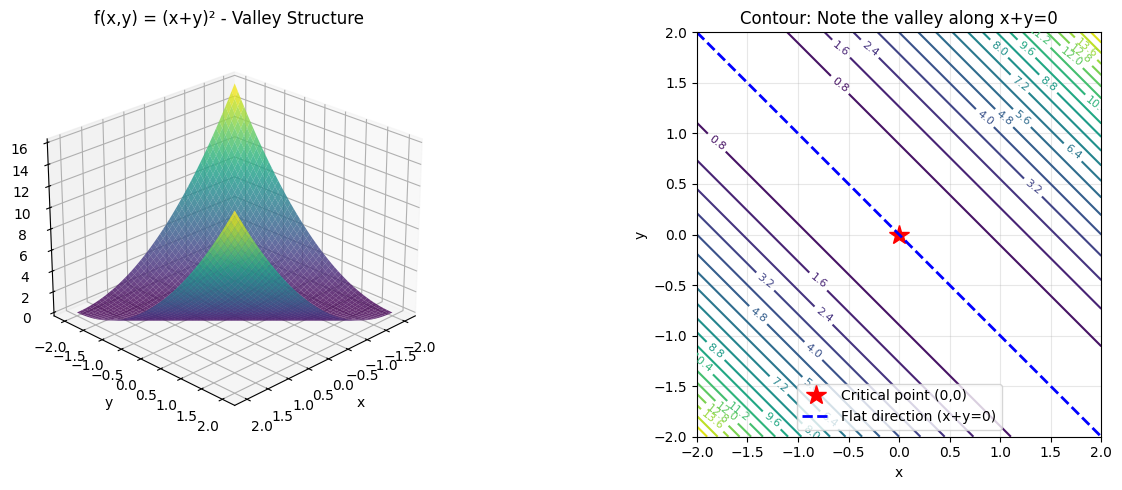


Key observations:
1. The function is FLAT (zero curvature) along the line x+y=0
2. The function curves UP perpendicular to this line
3. This creates a 'valley' or 'trough' structure
4. In deep learning, this represents strong CORRELATION between parameters
5. Optimization can be slow along the valley - need adaptive methods!


In [58]:
# Visualize the correlated function
fig = plt.figure(figsize=(14, 5))

# 3D surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
X_corr, Y_corr = np.meshgrid(x_range, y_range)
Z_corr = f3(X_corr, Y_corr)

surf = ax1.plot_surface(X_corr, Y_corr, Z_corr, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('f(x,y) = (x+y)² - Valley Structure')
ax1.view_init(elev=25, azim=45)

# Contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X_corr, Y_corr, Z_corr, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.plot(0, 0, 'r*', markersize=15, label='Critical point (0,0)')

# Show the flat direction (eigenvalue = 0): x + y = 0
x_line = np.linspace(-2, 2, 100)
y_line = -x_line  # x + y = 0
ax2.plot(x_line, y_line, 'b--', linewidth=2, label='Flat direction (x+y=0)')

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour: Note the valley along x+y=0')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print("\nKey observations:")
print("1. The function is FLAT (zero curvature) along the line x+y=0")
print("2. The function curves UP perpendicular to this line")
print("3. This creates a 'valley' or 'trough' structure")
print("4. In deep learning, this represents strong CORRELATION between parameters")
print("5. Optimization can be slow along the valley - need adaptive methods!")

## 2️⃣ Matrix Definiteness

For a **symmetric matrix** $A$, its definiteness is determined by the **signs of its eigenvalues**.

| Type | Eigenvalues | Condition on $x^T A x$ | Interpretation |
|------|--------------|---------------------------|----------------|
| **Positive definite (PD)** | all $>0$ | $x^T A x > 0$ for all $x\neq0$ | Always curves **upward** |
| **Negative definite (ND)** | all $<0$ | $x^T A x < 0$ for all $x\neq0$ | Always curves **downward** |
| **Indefinite** | some $+$, some $-$ | depends on direction | Curves **up** in some directions, **down** in others |
| **Positive semi-definite (PSD)** | all $\ge 0$ | $x^T A x \ge 0$ | Flat in some directions, curves up in others |
| **Negative semi-definite (NSD)** | all $\le 0$ | $x^T A x \le 0$ | Flat in some directions, curves down in others |

**Quick Test (2×2 case):**
For $A = \begin{bmatrix} a & b \\ b & c \end{bmatrix}$:
- PD if $a>0$ and $ac-b^2>0$
- ND if $a<0$ and $ac-b^2>0$
- Indefinite if $ac-b^2<0$

In [59]:
def classify_definiteness(A):
    """
    Classify the definiteness of a symmetric matrix based on its eigenvalues.
    """
    eigenvalues = np.linalg.eigvals(A)
    
    if np.all(eigenvalues > 1e-10):  # all positive (with tolerance)
        return "Positive Definite (PD)", eigenvalues
    elif np.all(eigenvalues < -1e-10):  # all negative
        return "Negative Definite (ND)", eigenvalues
    elif np.all(eigenvalues >= -1e-10):  # all non-negative
        return "Positive Semi-Definite (PSD)", eigenvalues
    elif np.all(eigenvalues <= 1e-10):  # all non-positive
        return "Negative Semi-Definite (NSD)", eigenvalues
    else:  # mixed signs
        return "Indefinite", eigenvalues

# Test different matrices
matrices = {
    "H1 (x²+3y²)": H1,
    "H2 (x²+xy+y²)": H2,
    "H3 (x²+2xy+y²)": H3,
    "Negative definite": np.array([[-2, 0], [0, -3]]),
    "Indefinite (saddle)": np.array([[2, 0], [0, -2]]),
    "PSD (flat direction)": np.array([[2, 0], [0, 0]])
}

print("Matrix Definiteness Classification:")
print("="*60)
for name, matrix in matrices.items():
    def_type, eigs = classify_definiteness(matrix)
    print(f"\n{name}:")
    print(f"  Type: {def_type}")
    print(f"  Eigenvalues: {eigs}")

Matrix Definiteness Classification:

H1 (x²+3y²):
  Type: Positive Definite (PD)
  Eigenvalues: [2. 6.]

H2 (x²+xy+y²):
  Type: Positive Definite (PD)
  Eigenvalues: [3. 1.]

H3 (x²+2xy+y²):
  Type: Positive Semi-Definite (PSD)
  Eigenvalues: [4.0000000e+00 4.4408921e-16]

Negative definite:
  Type: Negative Definite (ND)
  Eigenvalues: [-2. -3.]

Indefinite (saddle):
  Type: Indefinite
  Eigenvalues: [ 2. -2.]

PSD (flat direction):
  Type: Positive Semi-Definite (PSD)
  Eigenvalues: [2. 0.]


## 3️⃣ Interpreting Hessian Definiteness and Surface Shape

The **Hessian matrix** determines how a scalar function behaves near a critical point (where the gradient = 0).

| Hessian Type | Eigenvalues | Surface Shape | Interpretation |
|---------------|--------------|----------------|----------------|
| **Positive definite** | all positive | 🟢 Bowl (convex up) | Local minimum |
| **Negative definite** | all negative | 🔴 Dome (concave down) | Local maximum |
| **Indefinite** | mixed signs | ⚫ Saddle | Neither min nor max |
| **Positive semi-definite** | ≥ 0 | ⚪ Flat-bottom bowl | Possibly minimum, but flat in some directions |
| **Negative semi-definite** | ≤ 0 | ⚪ Flat-top dome | Possibly maximum, but flat in some directions |

### **Visualization Intuition**
- $H = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$: round bowl → **minimum**  
- $H = \begin{bmatrix} -2 & 0 \\ 0 & -2 \end{bmatrix}$: round hill → **maximum**  
- $H = \begin{bmatrix} 2 & 0 \\ 0 & -2 \end{bmatrix}$: saddle surface → **neither**  
- $H = \begin{bmatrix} 2 & 0 \\ 0 & 0 \end{bmatrix}$: flat along one axis → **semi-definite**

### Visualization: Different Surface Types

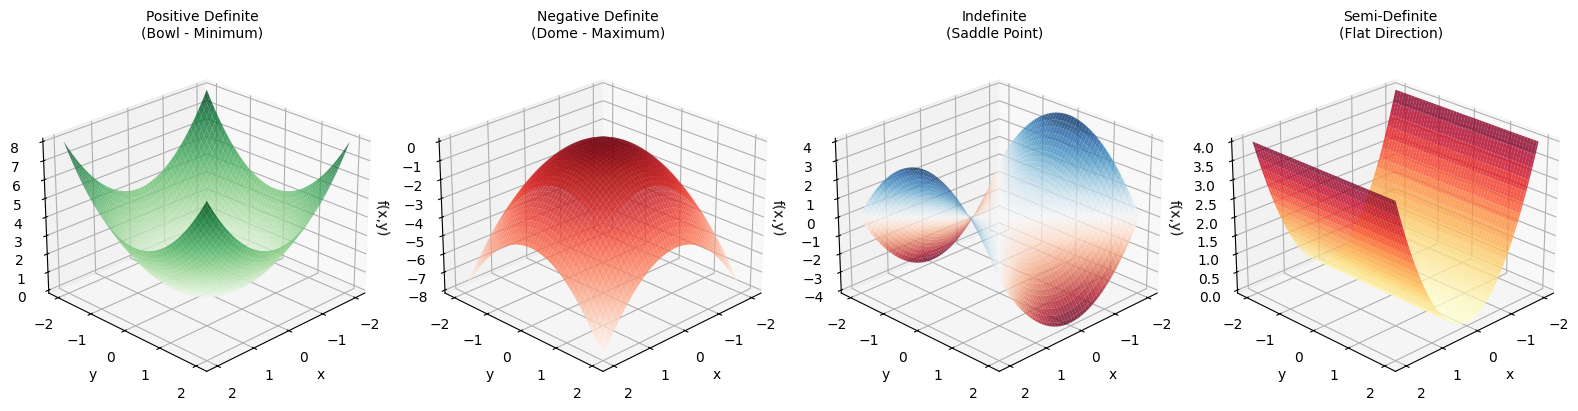

In [60]:
# Create grid for plotting
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Define different functions with different Hessian types
def positive_definite(x, y):
    """Minimum: f = x² + y²"""
    return x**2 + y**2

def negative_definite(x, y):
    """Maximum: f = -x² - y²"""
    return -x**2 - y**2

def indefinite(x, y):
    """Saddle: f = x² - y²"""
    return x**2 - y**2

def semi_definite(x, y):
    """Flat direction: f = x²"""
    return x**2

# Create subplots
fig = plt.figure(figsize=(16, 4))

functions = [
    (positive_definite, "Positive Definite\n(Bowl - Minimum)", "Greens"),
    (negative_definite, "Negative Definite\n(Dome - Maximum)", "Reds"),
    (indefinite, "Indefinite\n(Saddle Point)", "RdBu"),
    (semi_definite, "Semi-Definite\n(Flat Direction)", "YlOrRd")
]

for idx, (func, title, cmap) in enumerate(functions, 1):
    ax = fig.add_subplot(1, 4, idx, projection='3d')
    Z = func(X, Y)
    
    surf = ax.plot_surface(X, Y, Z, cmap=cmap, alpha=0.8, 
                           linewidth=0, antialiased=True)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title(title, fontsize=10)
    ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

### Contour Plots for Better Understanding

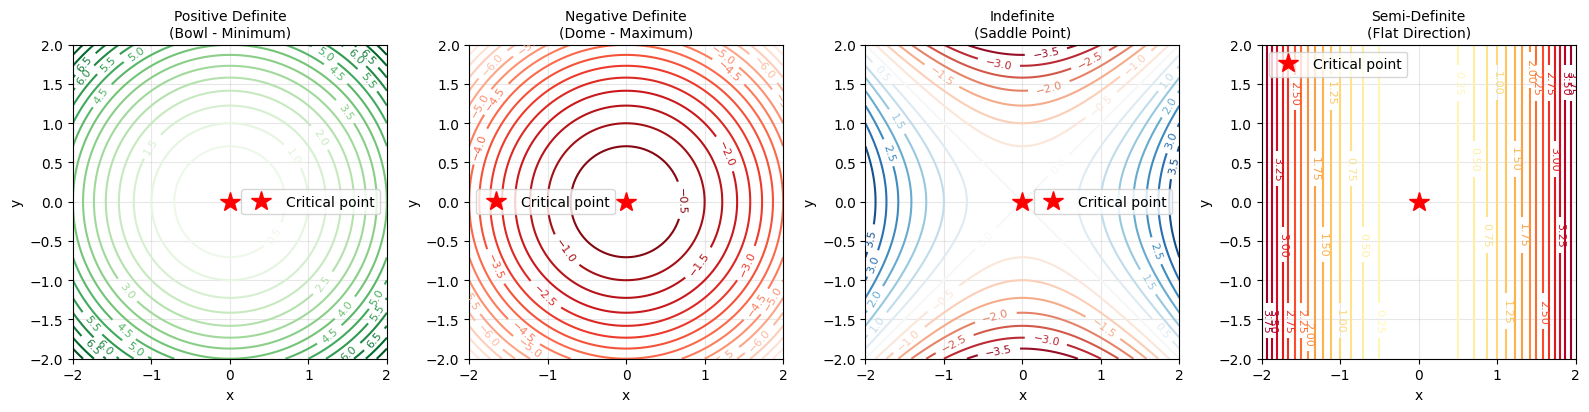

Contour interpretation:
- Positive Definite: Concentric circles/ellipses around minimum
- Negative Definite: Concentric circles/ellipses around maximum
- Indefinite: Hyperbolic contours (saddle point)
- Semi-Definite: Parallel lines (flat in one direction)


In [61]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, (func, title, cmap) in enumerate(functions):
    ax = axes[idx]
    Z = func(X, Y)
    
    contour = ax.contour(X, Y, Z, levels=15, cmap=cmap)
    ax.clabel(contour, inline=True, fontsize=8)
    
    # Mark the critical point at origin
    ax.plot(0, 0, 'r*', markersize=15, label='Critical point')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title, fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

print("Contour interpretation:")
print("- Positive Definite: Concentric circles/ellipses around minimum")
print("- Negative Definite: Concentric circles/ellipses around maximum")
print("- Indefinite: Hyperbolic contours (saddle point)")
print("- Semi-Definite: Parallel lines (flat in one direction)")

## 🧠 Summary

### Key Relationships

| Concept | Order | What it tells us |
|---------|-------|------------------|
| **Gradient** (Jacobian) | 1st order | Direction of **steepest ascent** |
| **Hessian** | 2nd order | **Curvature** (how gradient changes) |
| **Eigenvalues of Hessian** | - | Type of curvature (up/down/mixed) |
| **Definiteness** | - | Nature of critical point (min/max/saddle) |

### Decision Tree for Critical Points

```
At critical point (∇f = 0):
    |
    ├─ All eigenvalues > 0  →  Positive Definite  →  LOCAL MINIMUM
    |
    ├─ All eigenvalues < 0  →  Negative Definite  →  LOCAL MAXIMUM
    |
    ├─ Mixed signs          →  Indefinite         →  SADDLE POINT
    |
    └─ Some zero eigenvalues → Semi-definite     →  TEST FURTHER
```

### Practical Implications for Deep Learning

1. **Positive definite Hessian** → Loss surface is **convex** locally → guaranteed to find minimum
2. **Negative definite Hessian** → Unstable (at a maximum) → need to escape
3. **Indefinite Hessian** → **Saddle point** → common in high-dimensional spaces
4. **Large eigenvalues** → **Steep curvature** → small learning rate needed
5. **Small eigenvalues** → **Flat region** → slow convergence

---

You are now ready for **Chapter 7.1: Optimization for Training Deep Models**!

## 🔗 Connection to Deep Learning Practice

### Local vs Global Minima

**Important distinction:**
- **Bowl (Positive Definite Hessian)** = **Local minimum** (lowest point in a neighborhood)
- **Global minimum** = Absolute lowest point across the entire loss surface

```
Deep Learning Reality:
    ┌─────────────────────────────────────────────┐
    │  Loss Surface = High-dimensional landscape  │
    │  with MANY local minima                     │
    └─────────────────────────────────────────────┘
              ↓
    We rarely find THE global minimum
    We find A GOOD local minimum (good enough!)
```

### Why "Good Enough" Local Minima Work

In deep learning, we **don't need the global minimum** because:

1. **Generalization matters more than perfect training loss**
   - A slightly higher training loss often generalizes better
   - Overfitting happens when we optimize training loss too much

2. **Many local minima perform similarly well**
   - Modern neural networks have many "good" local minima
   - Empirically, SGD finds solutions that generalize well

3. **The journey matters**
   - How we arrive at the minimum (via SGD with noise) provides implicit regularization
   - This helps avoid overfitting

### Saddle Points: The Real Challenge

**In high-dimensional spaces (neural networks):**

```
Problem: Most critical points are SADDLE POINTS, not local minima!

Why?
- In n-dimensional space, need ALL n eigenvalues > 0 for minimum
- Probability of this decreases exponentially with dimension
- More likely to have mixed signs → saddle point
```

**What happens at a saddle point:**
- Gradient = 0 (seems like we're stuck!)
- But: Some directions curve up, some down
- SGD's noise helps escape by exploring different directions
- Momentum-based optimizers help "push through" saddle points

### Curvature and Learning Rate

The Hessian's eigenvalues directly affect optimization:

| Scenario | Eigenvalues | What happens | Solution |
|----------|-------------|--------------|----------|
| **Steep curvature** | Large positive | Gradient descent overshoots | Use **small learning rate** |
| **Flat region** | Small positive | Very slow progress | Use **large learning rate** or momentum |
| **Different directions** | Mixed magnitudes | Some directions converge fast, others slow | **Adaptive learning rates** |
| **Saddle point** | Mixed signs | Gradient vanishes but not at minimum | **Momentum** or noise helps escape |

### Practical Takeaways

1. **Finding a bowl ≠ Best solution**
   - It's a local minimum, might not be global
   - But often "good enough" for practical purposes

2. **Saddle points are common**
   - Don't panic if training slows down temporarily
   - SGD noise and momentum help escape

3. **Curvature varies across loss surface**
   - Adaptive optimizers handle this automatically
   - Learning rate schedules help navigate different regions

4. **High-dimensional intuition breaks down**
   - What seems like a minimum in 2D visualization
   - Might be a saddle point in 1000D parameter space

5. **We optimize for generalization, not perfect training loss**
   - Stopping before reaching the absolute minimum often helps
   - Early stopping, regularization prevent over-optimization

---

**Key insight for Chapter 7:** Understanding curvature helps explain *why* certain optimization algorithms work and *when* to use them!